https://www.cs.cornell.edu/projects/kddcup/datasets.html

In [25]:
!tar xzvf hep-th-2003.tar.gz

2003/
2003/0301001
2003/0301002
2003/0301003
2003/0301004
2003/0301005
2003/0301006
2003/0301007
2003/0301008
2003/0301009
tar: write error


In [3]:
!ls -hal 2003/ | wc -l

1022


In [38]:
import re
import time
import glob
import matplotlib.pyplot as plt

In [33]:
list_of_files = glob.glob('2003/*')

In [34]:
len(list_of_files)

1019

In [35]:
start_time=time.time()
reslts={}
number_of_eq=0
for this_file in list_of_files:
    with open(this_file,'rb') as f:
        data = f.read()
    
    resp = re.findall('\\\\begin{(?:eqnarray|equation|multiline)}.*?end{(?:eqnarray|equation|multiline)}',str(data),re.DOTALL)
#    print(this_file)
    for eq in resp:
        number_of_eq+=1
        try:
            reslts[this_file].append(eq)
        except KeyError:
            reslts[this_file]=[]
            reslts[this_file].append(eq)
#        print('  ',eq,'\n')

print(round(time.time()-start_time,2),'seconds')

7.82 seconds


In [36]:
number_of_eq

29481

In [37]:
len(reslts.keys())

929

In [46]:
number_of_eq_per_file=[]
for k,v in reslts.items():
    number_of_eq_per_file.append(len(v))

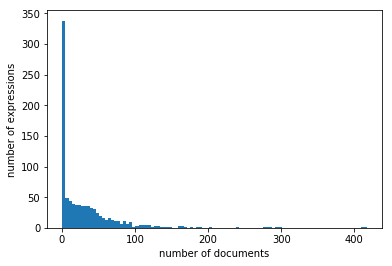

In [47]:
_=plt.hist(number_of_eq_per_file,bins=100)
_=plt.ylabel('number of expressions')
_=plt.xlabel('number of documents')

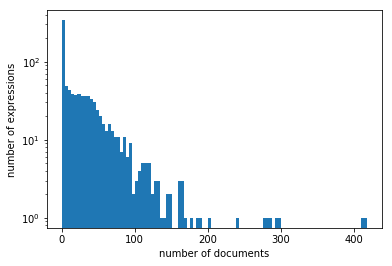

In [48]:
_=plt.hist(number_of_eq_per_file,bins=100)
_=plt.yscale('log', nonposy='clip')
_=plt.ylabel('number of expressions')
_=plt.xlabel('number of documents')